# Galápagos Island Finches

Every year for the past 40-plus years, Peter and Rosemary Grant have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. Using statistical inference, we will analyze their data and witness evolution in action! 

Credit for guidance for this case study to Justin Bois and his statisitcal analysis datacamp course. 

## Darwin's finches: A statistical analysis

Taking a dataset on finch beak dimensions, we'll be performing an analysis demonstrating various statisitical concepts. Some of the tools we'll be employing include: 

- Graphical and quantitative exploratory data analysis (EDA) 
- Parameter estimation
- Confidence interval calculation
- Hypothesis testing

But first, a little background:

### Charles Darwin

<img src = "Images/Finches-1-Darwin.png" width = 500>

Image: Public domain, US

Many of the important observations that led Charles Darwin to develop his insights and the theory of evolution came from his Journey to the Galápagos archipelgo. 

<img src = "Images/Finches-2-Galapagos.png" width = 500>
Image: NASA

Particularly, his study of finches (small birds) inhabited these islands and how they changed and adjusted to their environment. 

The islands were a perfect test lab for studying evolution due to their isolated nature and lower numbers of interactions with other species. Additionally, because the numbers are small, an entire population of a given island can be monitored. 

### The island of Daphne Major and Daphne Minor

<img src = "Images/Finches-3-Daphnes.png" width = 500>

Image: Grant and Grant, 2014

Every year since 1973, Peter and Rosemary Grant spent months on one of the Galápagos islands known as Daphne Major. 

### The finches of Daphne Major

- There are two major species of finches on the Daphne Major, pictured here: 

#### Geospiza fortis

<img src = "Images/Finches-4-Daphne Major.png" width = 500>

#### Geospiza scandens

<img src = "Images/Finches-5-Daphne Major.png" width = 500>

Source: John Gould, public domain

### The data

- They wrote a book! 
    - Peter and Rosemary Grant *40 Years of Evolution: Darwin's Finches on Daphne Major Island* Princeton University Press, 2014 

- They also posted their data and we acquired it at Dryad: 
    - Data acquired from [Dryad Digital Repository](http://dx.doi.org/10.5061/dryad.g6g3h)

### The dimensions of the finch beak

- Although the dataset is very rich, we will focus our efforts on two measurements: length and depth. 


<img src = "Images/Finches-6-BeakLength.png" width = 500>
<img src = "Images/Finches-7-BeakDepth.png" width = 500>

Source: John Gould, public domain

### Questions we want to Answer

- How do the beaks change over time?
- How do the species differ?
- How are characteristic transferred from generation to generation? 

### Basic beginnings

We'll start with some EDA of how beak depth has changed over time. We'll be looking specifically at beak depths in 1975 compared to 2012. 
Then we'll estimate parameters of mean beak depth with confidence intervals. Finally, we'll perform a hypothesis test to see if the mean beak depth has changed between those years. 



## EDA of beak depths and lengths of Darwin's finches

Let's study how the dimensions of the finch species *Geospiza scandens* has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, *Geospiza fortis*. These effects can lead to changes in the species over time. Let's look first at the beak depth of *G. scandens* on Daphne Major in 1975 and in 2012 by first plotting all the measurements of those two years. We'll use a bee swarm plot since it's a small amount of data and is more intutive than a box plot. Bee swarm plots also help to eliminate bias by showing all the data instead of a histogram's bins. We'll then replicate the workflow for the beak lengths. 

We'll also begin with some basic statistics on the datasets before we clean them. 

In [35]:
#The data are stored in a pandas DataFrame called `df` with columns `'year'` and `'beak_depth'`. The units of beak depth are millimeters (mm).

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import
finches1975 = pd.read_csv('data/finch_beaks_1975.csv')
finches2012 = pd.read_csv('data/finch_beaks_2012.csv')
print('General information:')
print('1975:')
finches1975.info()
print('2012:')
finches2012.info()
print('\nSummary Statistics:')
print('1975:')
finches1975.describe()
print('2012:')
finches2012.describe()
print('\nFirst and last 5 rows:')
print('1975 :')
finches1975.head()
finches1975.tail()
print('2012:')
finches2012.head()
finches2012.tail()

General information:
1975:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
band               403 non-null int64
species            403 non-null object
Beak length, mm    403 non-null float64
Beak depth, mm     403 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.7+ KB
2012:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
band       248 non-null int64
species    248 non-null object
blength    248 non-null float64
bdepth     248 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.8+ KB

Summary Statistics:
1975:


,band,"Beak length, mm","Beak depth, mm"
count,403.000000,403.000000,403.000000
mean,1873.183623,11.332804,9.125955
std,4584.953069,1.619126,0.708737
min,2.000000,8.700000,7.500000
25%,458.500000,10.200000,8.600000
50%,671.000000,10.900000,9.100000
75%,899.500000,11.740000,9.700000
max,20298.000000,15.940000,10.980000


2012:


,band,blength,bdepth
count,248.000000,248.000000,248.000000
mean,20119.641129,12.004315,8.902823
std,844.713528,1.642203,0.757521
min,19022.000000,9.000000,7.200000
25%,19436.750000,10.475000,8.300000
50%,19817.500000,12.300000,8.900000
75%,21135.250000,13.425000,9.400000
max,22000.000000,15.200000,11.100000



First and last 5 rows:
1975 :


,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


,band,species,"Beak length, mm","Beak depth, mm"
398,20225,scandens,14.55,9.45
399,20252,scandens,14.05,9.05
400,20255,scandens,14.45,8.75
401,20266,scandens,15.05,9.45
402,20279,scandens,13.25,8.35


2012:


,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


,band,species,blength,bdepth
243,21295,scandens,14.2,9.3
244,21297,scandens,13.0,9.8
245,21340,scandens,14.6,8.9
246,21342,scandens,13.1,9.8
247,21347,scandens,15.2,9.1


Let's combine these into an easier dataset, standardizing the column names and adding the years. 

In [23]:
finches1975['year'] = 1975
finches2012['year'] = 2012
finches1975.columns = ['band', 'species', 'beak_length', 'beak_depth', 'year']
finches2012.columns = ['band', 'species', 'beak_length', 'beak_depth', 'year']
finches = finches1975.append(finches2012)
finches.head()
finches.describe()



,band,species,beak_length,beak_depth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


,band,beak_length,beak_depth,year
count,651.000000,651.000000,651.000000,651.000000
mean,8824.215054,11.588618,9.040952,1989.095238
std,9586.864492,1.659108,0.735171,17.981790
min,2.000000,8.700000,7.200000,1975.000000
25%,571.500000,10.300000,8.500000,1975.000000
50%,923.000000,11.000000,9.000000,1975.000000
75%,19659.000000,13.100000,9.600000,2012.000000
max,22000.000000,15.940000,11.100000,2012.000000


Now we'll take a subset of just the *scandens* species to perform our analysis on. 

In [33]:
#Verify there are only two species in the dataset:
finches.species.unique()

scandens_depth = finches.loc[finches.species == 'scandens'][['beak_depth', 'year']].reset_index(drop = True)
scandens.describe()

array(['fortis', 'scandens'], dtype=object)

,beak_depth,year
count,214.000000,214.000000
mean,9.094252,1996.957944
std,0.637941,18.216566
min,7.700000,1975.000000
25%,8.662500,1975.000000
50%,9.075000,2012.000000
75%,9.500000,2012.000000
max,11.000000,2012.000000


### Swarm plot:

Now that we've cleaned the data, let's make a bee swarm plot: 



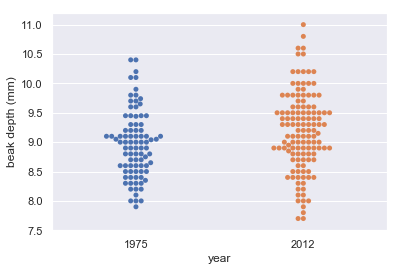

In [37]:
#default plotting to seaborn style
sns.set()

# Create bee swarm plot
_ = sns.swarmplot(x='year', y='beak_depth', data=scandens)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

It can be hard to tell if over the forty years, much has changed. Just looking though, it seems like beak depth widened in variability and the mean and median have increased. Let's replicate this for beak length and the same parameters for the second species. We'll first melt the dataframe to make it easier to create a Facetplot in Seaborn. 

In [50]:
#create and look at the new dataframe
finch_melt = pd.melt(finches, id_vars=['species', 'year'], value_vars=['beak_length', 'beak_depth'])
finch_melt.head()

,species,year,variable,value
0,fortis,1975,beak_length,9.4
1,fortis,1975,beak_length,9.2
2,fortis,1975,beak_length,9.5
3,fortis,1975,beak_length,9.5
4,fortis,1975,beak_length,11.5


C:\Users\593787\anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


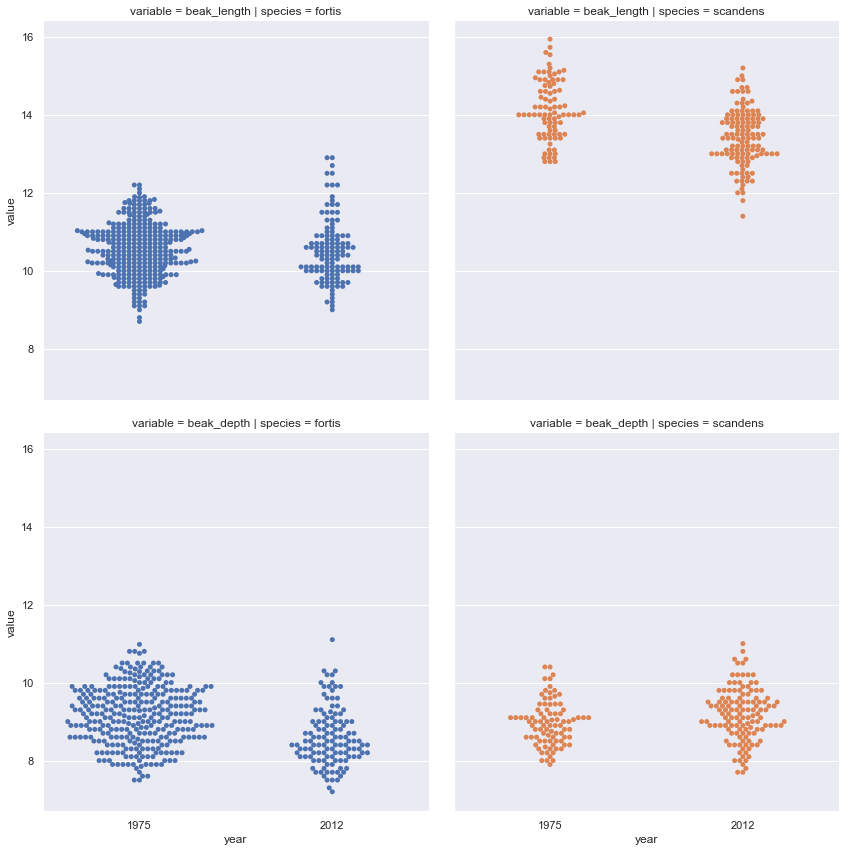

In [51]:
ordered_rows = finch_melt.value.value_counts().index

g = sns.FacetGrid(finch_melt, col="species",  row="variable", height=6, aspect=1, hue = "species")
g = g.map(sns.swarmplot, "year", "value")
plt.show()

## ECDFs of beak depths

In [ ]:
t()

## Parameter estimates of beak depths

In [ ]:
t()

## Hypothesis test: Are beaks deeper in 2012?

In [ ]:
t()

## Variation of beak shapes

<img src = "Images/Finches-8-Drought.png" width = 500>

The drought of winter 1976/1977
Source: Grant and Grant, 2014

<img src = "Images/Finches-6-BeakLength.png" width = 500>
<img src = "Images/Finches-7-BeakDepth.png" width = 500>

Source: John Gould, public domain

```
Hintttdraw_bs_pairs_linreg() will come in handy
```
Let's do it!
```


## EDA of beak length and depth

In [ ]:
t()

## Linear regressions

In [ ]:
t()

## Displaying the linear regression results

In [ ]:
t()

## Beak length to depth ratio

In [ ]:
t()

## How different is the ratio?

In [ ]:
t()

## Calculation of heritability

Calculation of heredity
```
The finches of Daphne Major
Source: John Gould, public domain
Geospiza fortis
Geospiza scandens
```
Heredity
- The tendency for parental traits to 
be inherited by offspring
```
Let's do it!
```


## EDA of heritability

In [ ]:
t()

In [ ]:
pd.read_csv('data/scandens_beak_depth_heredity.csv')
pd.read_csv('data/fortis_beak_depth_heredity.csv.csv')

## Correlation of offspring and parental data

In [ ]:
t()

## Pearson correlation of offspring and parental data

In [ ]:
t()

## Measuring heritability

In [ ]:
t()

## Is beak depth heritable at all in G. scandens?

In [ ]:
t()

## Final thoughts

Final thoughts
```
Your statistical thinking skills
- Perform EDA 
- Generate e
"
ective plots like ECDFs 
- Compute summary statistics 
- Estimate parameters 
- By optimization, including linear regression 
- Determine confidence intervals 
- Formulate and test hypotheses
```
Bon voyage!

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #default is 'last_expr'

import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
from tkinter import *
import os
import numpy as np
from PIL.ImageGrab import grabclipboard

def chapterImport():
    """Expand all text on course overview page, starting with the first '1' icon down to the last 50 xp number.
    Copy and paste it into the Chapter_content.txt file in the data folder.
    Run this function and it will print out all your headings. 
    Use the 'Ctrl+shift+-' keyboard shortcut to split each heading to a new cell."""
    import re
    string = open('data/Chapter_content.txt', 'r').read()
    lines = string.split('\n')
    chapters = []
    descriptions = []
    for index, line in enumerate(lines):
        try:
            print('# Chapter - ',re.search('^\d+$', line).group(), lines[index+1])
            chapters +=[index, index+1]
        except:
            pass
        if index not in chapters:
            if '%' in line:
                print(lines[index+1])
                descriptions +=[index, index+1]
            if 'Icon' in line and 'xp' in lines[index+2]:
                print('## '+lines[index+1])
                if 'interactive' in line or ' mc' in line:
                    print('t()')
    return

def t():
    '''This prettifies most data on datacamps exercise pages into markdown from html. 
    It relies on two copies and pastes into the text file page_content.
    Right click the exercise or instructions text in the window, click inspect, 
    select the header that encapsulates all the text for that section (usually div or ul)
    copy that element with ctrl+c and paste into the text file
    run this function and it will print out the properly formatted data
    
    Adjusted to not need the text file, it will read system clipboard then 
    paste formatted text back into clipboard for pasting into markdown cell.
    '''
    #with open('data/page.txt') as file:
    #    page = file.read()
    r = Tk()
    page = r.clipboard_get()
    #soup = BeautifulSoup(html_doc)
    soup = BeautifulSoup(page)
    string = ''
    exercise_tags = soup.find_all("div", {"class": "exercise--assignment"})
    instructions_tags = soup.find_all("div", {"class": "exercise--instructions"})
    try:
        string += str(exercise_tags[0].find_all("div")[0])
    except:
        quiz_tags = soup.find_all("div", {"class": "exercise-area"})
        string += str(quiz_tags[0].find_all("div")[0])
    try:
        for i in range(len(instructions_tags)):
            if len(instructions_tags)>1:
                string += str(i+1)+'. '+str(instructions_tags[i])
            else:
                string += str(instructions_tags[i])
    except:
        pass
    #string = open('data/page_content.txt', 'r').read()
    hyperlinks = re.findall("<a.*?>.*?</a>", string)
    formatted = []
    for link in hyperlinks:
        text = re.sub('<a.*?>', '', re.sub('</a>', '', link))
        link = re.sub('<a.*?"', '', re.sub('" target.*', '', link))
        formatted += ['['+text+']'+'('+link+')']
        string = string.replace(re.search("<a.*?>.*?</a>", string).group(), '['+text+']'+'('+link+')',1)
    string = re.sub('<li.*?>', '- ', string)
    string = re.sub(r'\d+ XP', '', string)
    string = re.sub('</p.*?></div.*?>', '</li></li>---</li>', string)
    string = re.sub('<hr/>', '</li></li>---</li>', string)
    string = string.replace('</p>\n<p>', '</p></li></li><p>')
    delete = ['<p>', '</p>','</?ul.*?>', '</?label.*?>', '</?input.*?>', '</?span.*?>', '</?div.*?>', '</?math.*?>','<msup.*?/msup>', '<nobr.*?/nobr>', '" role="presentation" style="position: relative;">', 'press\d', '<button.*?/button>', '<svg.*?/svg>']
    for el in delete:
        string = re.sub(el, '', string) 
    newLine = ['</h1>', '</h2>', '</h3>', '</h4>', '</h5>']
    for el in newLine:
        string = re.sub(el, '</li>', string)
    for i in range(1,7):
        string = re.sub('<h'+str(i)+'.*?>', '#'*i+' ', string)
    #string = re.sub(r'<section.*?>', '', string) 
    string = string.replace('##### Answer the question', '')
    string = string.replace('<pre><code>', '```</li>').replace('</code></pre>', '```</li>')
    string = string.replace('<blockquote>','```</li>').replace('</blockquote>', '```</li>')
    string = re.sub('<script type="math/tex" id="MathJax.*?>', '$', string)
    string = re.sub('<mi>.*?</mi><script .*?(MathJax|tex).*?>', '$', string)
    string = re.sub('</script>', '$', string)
    string = re.sub(r"This has been done for you, so hit 'Submit Answer' to s(.*)", r'S\1', string)
    string = re.sub(r"This has been done for you, so hit 'Submit Answer' to v(.*)", r'V\1', string)
    string = string.replace('<code>', '`').replace('</code>', '`')
    string = string.replace('<em>', '*').replace('</em>', '*')
    string = string.replace('<b>', '**').replace('</b>', '**')
    string = string.replace('<strong>', '**').replace('</strong>', '**')
    string = string.replace('&lt;', '<').replace('&gt;', '>')
    string = string.replace('\\n', '</li>\\n\\n</li>')
    #string = re.sub(r'\[Take Hint \(-\d+? XP\)\]\(exercise--show-hint" data-cy="exercise-show-hint" href="javascript:void\(0\)">Take Hint \(-\d+? XP\)</a>\)', '',string)
    string = string.replace('[Take Hint (-30 XP)](exercise--show-hint" data-cy="exercise-show-hint" href="javascript:void(0)">Take Hint (-30 XP)</a>)', '')
    string = string.replace('[Take Hint (-15 XP)](exercise--show-hint" data-cy="exercise-show-hint" href="javascript:void(0)">Take Hint (-15 XP)</a>)', '')
    string = string.replace('[Take Hint (-10 XP)](exercise--show-hint" data-cy="exercise-show-hint" href="javascript:void(0)">Take Hint (-10 XP)</a>)', '')
    string = string.replace('[Take Hint (-9 XP)](exercise--show-hint" data-cy="exercise-show-hint" href="javascript:void(0)">Take Hint (-9 XP)</a>)', '')
    string = string.replace('[Take Hint (-8 XP)](exercise--show-hint" data-cy="exercise-show-hint" href="javascript:void(0)">Take Hint (-8 XP)</a>)', '')
    string = string.replace('[Take Hint (-7 XP)](exercise--show-hint" data-cy="exercise-show-hint" href="javascript:void(0)">Take Hint (-7 XP)</a>)', '')
    string = string.replace('[Take Hint (-6 XP)](exercise--show-hint" data-cy="exercise-show-hint" href="javascript:void(0)">Take Hint (-6 XP)</a>)', '')
    string = string.replace('[Take Hint (-5 XP)](exercise--show-hint" data-cy="exercise-show-hint" href="javascript:void(0)">Take Hint (-5 XP)</a>)', '')
    string = string.replace('[Take Hint (-)](exercise--show-hint" data-cy="exercise-show-hint" href="javascript:void(0)">Take Hint (-)</a>)', '')
    string = string.replace('Hit `Submit Answer` to ', '')
    string = string.replace('\" rel=\"noopener noreferrer', '')
    string = string.replace('This has been done for you.', '')
    string = string.split('</li>')
    string_for_copy = ''
    for i in string:
        print(i)
        string_for_copy += i+'\n'
    copy_df=pd.DataFrame([string_for_copy])
    copy_df.to_clipboard(index=False,header=False)
    return

def s(fileName):
    '''Slide Parser'''
    import PyPDF2
    import re
    title_elements_raw = ['INTERACTIVE DATA VISUALIZATION WITH BOKEH', 'Introduction to Data V', 'isualization with Python ']    
    title_elements = list(map(lambda x: x.lower(), title_elements_raw))
    with open(fileName, 'rb') as pdfFileObj:
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        title = pdfReader.getPage(0).extractText().split('\n')[0].lower()
        for i in range(pdfReader.numPages):
            pageItems = pdfReader.getPage(i).extractText().split('\n')
            for itemIndex, item in enumerate(pageItems):
                if item in title_elements:
                    pageItems[itemIndex] = re.sub(item, '', pageItems[itemIndex])
            arrayFilter = np.array([x != '' for x in pageItems])
            pageItems = np.array(pageItems)[arrayFilter].tolist()
            for index, item in enumerate(pageItems):
                if item.lower() != title:
                    if index == 0:
                        item = "```\n### "+ item
                    if index == 1:
                        item = "```\n" + item
                    if index == len(pageItems):
                        item = item + "```"
                    item = re.sub('^```\n!', '```\n- ', item)
                    item = re.sub('^!', '- ', item)
                    item = re.sub('^ +!', '- ', item)
                    item = re.sub(r"(\w+)!(\w+)", r"\1tt\2", item)
                    item = re.sub(r"Õ", '\'', item)
                    item = re.sub(r"Þ", 'fi', item)
                    item = re.sub(r"Ô", "'", item)
                    item = re.sub(r"Ò", "“", item)
                    item = re.sub(r"Ó", "”", item)
                    item = re.sub(r"É", "…", item)
                    item = re.sub(r"ß", "fl", item)
                    item = re.sub(r'^(```\n###.*?)In \[(.*)', r'\1\n```\nIn [\2', item)
                    item = re.sub(r'(.+?)In \[(.*?)', r'\1\nIn [\2', item)
                    item = re.sub(r'(.*?)Out\[(\d*?)\]:(.*?)', r'\1\nOut[\2]:\n\3', item)
                    item = re.sub(r'(.*)dtype: (.*)', r'\1\ndtype:\2', item)
                    item = re.sub(r'(.*?)\.\.\.:(.*?)', r'\1\n...:\2', item)
                    valid = True 
                    #help creating tables
                    for i in range(10):
                        if valid == True:
                            my_regex = r'(.*?) '+re.escape(str(i))+r' (.*?)'
                            if re.search(my_regex, item):
                                item = re.sub(my_regex, r'\1 \n'+str(i)+r' \2', item, count = 1)
                            else:
                                valid = False            

                    print(item)
    return

def headingText(fileName, pageNumber):
    '''Slide Parser'''
    import PyPDF2
    import re
    with open(fileName, 'rb') as pdfFileObj:
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        title_elements = ['STATISTICAL THINKING IN PYTHON I', 'Statistical Thinking in Python I', 'statistical thinking in python i']    
        pageItems = pdfReader.getPage(pageNumber-1).extractText().split('\n')
        for itemIndex, item in enumerate(pageItems):
            if item.lower() in title_elements:
                pageItems[itemIndex] = re.sub(item, '', pageItems[itemIndex])
        arrayFilter = np.array([x != '' for x in pageItems])
        pageItems = np.array(pageItems)[arrayFilter].tolist()
    print(pageItems[0])
    return pageItems[0]

def importText(moduleAbbreviation, text):
    if type(text) == str:
        wordList = re.sub(r'\W', ' ', text).split()
        name = moduleAbbreviation+"_".join([x[0].upper()+x[1:] for x in wordList])
        pathName = 'Images/'+name
        if os.path.isfile(pathName+'.png'):
            nextNumber = 2
            for i in range(2,9):
                if os.path.isfile(pathName+str(i)+'.png'):
                    nextNumber = i+1
            fileName = pathName+str(nextNumber)+'.png'
        else:
            fileName = pathName+'.png'
    else:
        fileName = 'No text found'
    return fileName

def importSaveImage(prefix, text):
    #use Win+Shift+S to take a screenshot before using this function
    fileName = importText(prefix, text)
    image = grabclipboard()
    image.save(fileName)
    return fileName

def sklearn_to_df(sklearn_dataset):
    data_df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    data_df['target'] = pd.Series(sklearn_dataset.target)
    if 'target_names' in sklearn_dataset.keys():
        df = pd.merge(data_df, pd.DataFrame(data.target_names, columns = ['target_name']), left_on = 'target', right_index = True)
    else:
        df = data_df
    return df


#suggested:
#importSaveImage('IDVwP', headingText("Slides/IntroDataVisualizationch2_slides.pdf", 9))